## 3. Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import precision_recall_curve
import seaborn as sns

In [2]:
X_train = pd.read_csv("X_train.csv", index_col = 0)
y_train = pd.read_csv("y_train.csv", index_col = 0)

X_test = pd.read_csv("X_test.csv", index_col = 0)
y_test = pd.read_csv("y_test.csv", index_col = 0)

In [3]:
def plot_metrics(name, model, X, y):

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'neg_log_loss']
    scores = dict()

    for score in scoring:
        scores[score] = cross_val_score(model, X, y.values.ravel(), cv=5, scoring=score)

    
    accuracy = np.mean(scores['accuracy'])
    precision = np.mean(scores['precision'])
    recall = np.mean(scores['recall'])
    f1 = np.mean(scores['f1'])
    roc_auc = np.mean(scores['roc_auc'])
    logloss = -np.mean(scores['neg_log_loss'])

    y_real = y.values.ravel()
    y_pred = model.predict(X)
    cm = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Dead', 'Alive'], yticklabels=['Dead', 'Alive'])
    plt.xlabel('Predicted outcome')
    plt.ylabel('True outcome')
    plt.title('Confusion Matrix')
    plt.show()
    
    metrics = pd.DataFrame({
    'Model' : [name],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC-AUC': [roc_auc],
    'Log Loss': [logloss]
    })

    return metrics

In [4]:
models = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'Log Loss'])

### 3.1 Logistic Regression

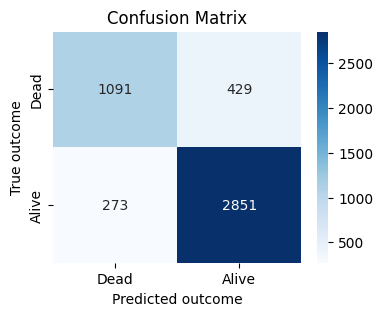

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Logistic Regression,0.846037,0.865628,0.91325,0.888667,0.929453,0.331724


In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty="l2")
logreg.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Logistic Regression", logreg, X_train, y_train)])
models.head()

Good overall metrix but still lots of dead patiets forecasted as alive

### 3.2 Decision Tree

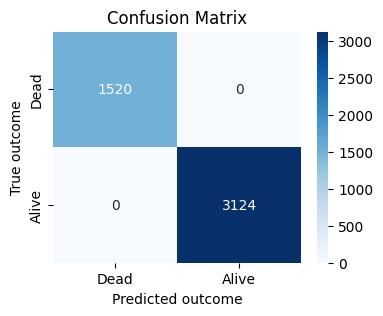

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Logistic Regression,0.846037,0.865628,0.913250,0.888667,0.929453,0.331724
0,Decision Tree,0.844963,0.882784,0.891802,0.887492,0.817124,5.689107


In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Decision Tree", tree, X_train, y_train)])
models.sort_values(by="F1 Score", ascending=False).head()

Perfect fit based on confusion matrix (uses all data) but worse metrics compared to Logistic Regression (using cross-validation), it's overfitting the data.

In [7]:
support = pd.concat([X_train, y_train], axis=1)
corr_matrix = support.corr(numeric_only=True)
corr_matrix["death"].sort_values()

days_followup                -0.689533
dzgroup_ARF/MOSF w/Sepsis    -0.188325
dzclass_ARF/MOSF             -0.123873
dzclass_COPD/CHF/Cirrhosis   -0.113522
dzgroup_COPD                 -0.080770
days_study                   -0.078112
dzgroup_CHF                  -0.059128
charges                      -0.058751
sex_female                   -0.046999
dementia_0                   -0.042431
race_black                   -0.038300
race_hispanic                -0.028602
diabetes_1                   -0.024114
meanbp                       -0.019667
wblc                         -0.017739
dzgroup_Cirrhosis            -0.017673
sod                          -0.017361
temp                         -0.013389
days_befstudy                -0.011244
hrt                          -0.006216
race_other                   -0.002821
race_asian                   -0.001087
resp                          0.009547
diabetes_0                    0.024114
crea                          0.038800
dementia_1               

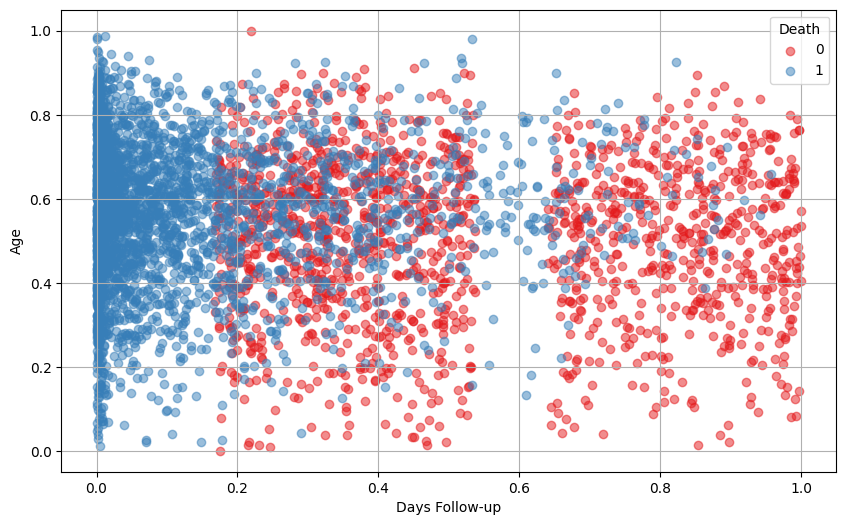

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Define color map
palette = sns.color_palette('Set1', n_colors=len(support['death'].unique()))

# Plot data points
for label, color in zip(support['death'].unique(), palette):
    plt.scatter(support.loc[support['death'] == label, 'days_followup'], 
                support.loc[support['death'] == label, 'age'], 
                color=color, label=label, alpha=0.5)

# Add labels and title
plt.xlabel('Days Follow-up')
plt.ylabel('Age')

# Add legend
plt.legend(title='Death')

# Show plot
plt.grid(True)
plt.show()


### Random Forest

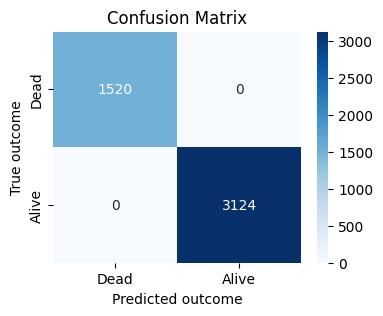

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Logistic Regression,0.846037,0.865628,0.913250,0.888667,0.929453,0.331724
0,Decision Tree,0.844963,0.882784,0.891802,0.887492,0.817124,5.689107
0,Random Forest,0.877049,0.934210,0.882203,0.907537,0.947017,0.279770


In [9]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Random Forest", forest, X_train, y_train)])
models.head()

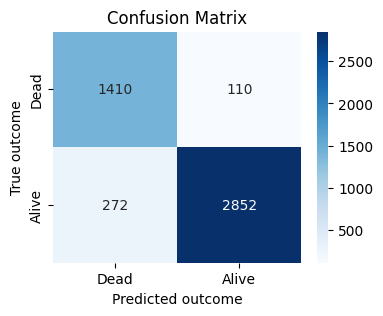

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Logistic Regression,0.846037,0.865628,0.913250,0.888667,0.929453,0.331724
0,Decision Tree,0.844963,0.882784,0.891802,0.887492,0.817124,5.689107
0,Random Forest,0.877049,0.934210,0.882203,0.907537,0.947017,0.279770
0,Gradient Boosting,0.888030,0.942571,0.887964,0.914217,0.958887,0.232739


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("Gradient Boosting", gbc, X_train, y_train)])
models.head()

### AdaBoosting

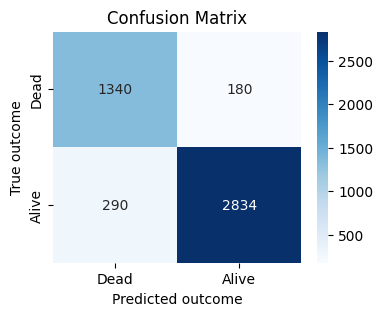

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Log Loss
0,Logistic Regression,0.846037,0.865628,0.913250,0.888667,0.929453,0.331724
0,Decision Tree,0.844963,0.882784,0.891802,0.887492,0.817124,5.689107
0,Random Forest,0.877049,0.934210,0.882203,0.907537,0.947017,0.279770
0,Gradient Boosting,0.888030,0.942571,0.887964,0.914217,0.958887,0.232739
0,AdaBoost,0.875755,0.922412,0.890523,0.906013,0.950312,0.528756


In [11]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train, y_train.values.ravel())
models = pd.concat([models, plot_metrics("AdaBoost", adb, X_train, y_train)])
models.head()

### GBC Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6], 
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8], 
}

grid_search = GridSearchCV(estimator=gbc, param_grid=grid, cv=3, n_jobs=-1, verbose=2, scoring='f1') 
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [13]:
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 300}
